In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading data
data=pd.read_csv('C:/Users/user/PGP-DSE/Time Series/Project group - 3/Electric_Production.csv',header=0,index_col=0,
                parse_dates=['DATE'])
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
data.rename({'IPG2211A2N':'IPG'},axis=1,inplace=True)

In [4]:
data.head()

,IPG
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [5]:
# Group by monthly data

groups = data.groupby(pd.Grouper(freq='A')) # grouping the one year data as months

months= pd.concat([pd.DataFrame(x[1].values) for x in groups],axis=1) # x[1] because x[0] is dates and x[1] is the temps
months=pd.DataFrame(months)

# Adding cols 1 tol 12
months.columns=range(1939,2020)

months


,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,3.3842,3.7717,4.1850,4.8050,5.2184,5.7350,6.0192,5.9417,6.7425,7.6467,...,119.2473,119.7475,111.8351,115.2323,124.0216,119.9317,116.8926,116.4746,128.9071,123.7679
1,3.4100,3.8233,4.2367,4.8567,5.2959,5.8125,6.0192,5.9417,6.6134,7.4659,...,110.7525,107.4965,103.3433,106.4512,112.6796,116.1393,105.9614,99.5393,107.6711,113.0855
2,3.4875,3.8492,4.2883,4.8825,5.3217,5.9159,5.9934,5.9417,6.5617,7.4917,...,98.3430,99.1848,93.4051,102.6701,104.4158,104.0218,94.2339,101.0063,104.5716,108.0490
3,3.5133,3.8492,4.3400,4.8825,5.3992,5.9417,5.9934,6.0450,6.5617,7.3367,...,86.2612,89.3568,87.4539,90.6136,89.8017,89.1544,88.1615,87.0374,93.4491,88.8719
4,3.5133,3.8750,4.3658,4.8825,5.4250,5.9417,6.0450,6.0967,6.5359,7.1817,...,90.8459,90.0903,92.7704,90.7000,91.8610,90.6950,89.4711,90.3591,93.2405,NaN
5,3.5650,3.9267,4.4433,4.9084,5.5284,5.9417,6.1225,6.1225,6.5359,7.2334,...,104.4774,102.9273,101.2446,100.6631,101.6422,102.8863,103.4258,100.4412,103.3083,NaN
6,3.5650,3.9267,4.4950,5.0634,5.5800,5.8900,6.0967,6.2517,6.5359,7.2850,...,113.1386,114.9326,113.3866,110.3583,108.6330,111.9826,114.1946,111.2371,113.3178,NaN
7,3.6167,3.9783,4.5467,5.0892,5.6059,5.9159,5.9934,6.3550,6.7167,7.4659,...,113.2550,113.7650,110.1671,108.4228,108.3892,110.7643,115.5015,107.7583,113.2758,NaN
8,3.7200,4.0300,4.5725,5.1150,5.7092,5.8900,5.8900,6.4325,6.8459,7.5950,...,100.3372,99.5821,96.9014,99.3427,100.4238,101.7996,102.2398,97.0813,101.5656,NaN
9,3.7200,4.0558,4.5983,5.1150,5.7092,5.8384,5.8384,6.5100,6.8717,7.6725,...,89.0653,90.3241,90.2609,91.6671,92.1366,90.9888,90.8499,92.3020,95.3203,NaN


In [6]:
# EDA and data cleaning (if required)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 964 entries, 1939-01-01 to 2019-04-01
Data columns (total 1 columns):
IPG    964 non-null float64
dtypes: float64(1)
memory usage: 15.1 KB


In [7]:
data['IPG'].isnull().sum() # no nulls

0

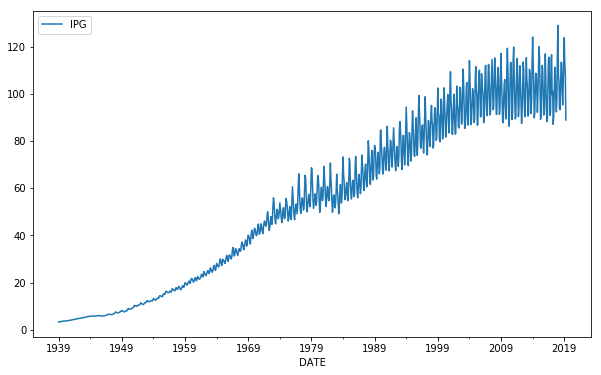

In [8]:
data.plot(figsize=(10,6)) # data looks to have multiplicative components

### Decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 720x432 with 0 Axes>

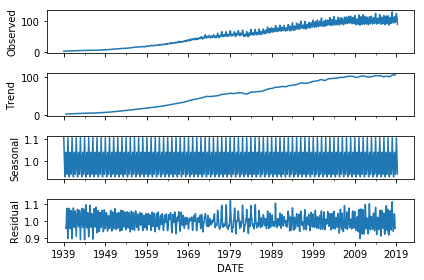

In [10]:
decomp_data=seasonal_decompose(data,model='multiplicative',freq=12)
plt.figure(figsize=(10,6))
decomp_data.plot()
plt.show()

In [11]:
# Extract all the components
trend=decomp_data.trend
seasonal=decomp_data.seasonal
residual=decomp_data.resid

In [12]:
# printing the component heads

print('Multiplicative model output: \n')
print('\n Trend: \n')
print(trend.head(12))
print('\n Seasonal \n')
print(seasonal.head(12))
print('\n Residuals: \n')
print(residual.head(12))

Multiplicative model output: 


 Trend: 

                 IPG
DATE                
1939-01-01       NaN
1939-02-01       NaN
1939-03-01       NaN
1939-04-01       NaN
1939-05-01       NaN
1939-06-01       NaN
1939-07-01  3.598362
1939-08-01  3.631729
1939-09-01  3.664021
1939-10-01  3.693087
1939-11-01  3.722154
1939-12-01  3.752296

 Seasonal 

                 IPG
DATE                
1939-01-01  1.108165
1939-02-01  1.053654
1939-03-01  1.006312
1939-04-01  0.938987
1939-05-01  0.924580
1939-06-01  0.975754
1939-07-01  1.028108
1939-08-01  1.039976
1939-09-01  0.986199
1939-10-01  0.937390
1939-11-01  0.955969
1939-12-01  1.044906

 Residuals: 

                 IPG
DATE                
1939-01-01       NaN
1939-02-01       NaN
1939-03-01       NaN
1939-04-01       NaN
1939-05-01       NaN
1939-06-01       NaN
1939-07-01  0.963643
1939-08-01  0.957582
1939-09-01  1.029486
1939-10-01  1.074566
1939-11-01  1.052704
1939-12-01  0.955367


### Detrending the data

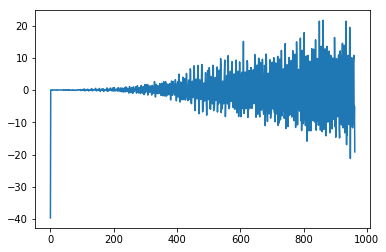

In [13]:
x=data['IPG'].copy()
diff=[]
for i in range(1,len(x)):
    val=x[i]-x[i-1]
    diff.append(val)

plt.plot(diff)

In [14]:
len(diff)

963

In [15]:
detrended=pd.DataFrame(data=diff,index=data.index[1:],columns=['IPG'])
detrended.head(10)

,IPG
DATE,
1939-02-01,-39.6769
1939-03-01,0.0775
1939-04-01,0.0258
1939-05-01,0.0000
1939-06-01,0.0517
1939-07-01,0.0000
1939-08-01,0.0517
1939-09-01,0.1033
1939-10-01,0.0000


### Deseasonalising the data

In [16]:
x=data['IPG']
diff=[]
months_in_year=12

for i in range(months_in_year,len(x)):
    val=x[i]-x[i-months_in_year]
    diff.append(val)

In [17]:
len(diff)

952

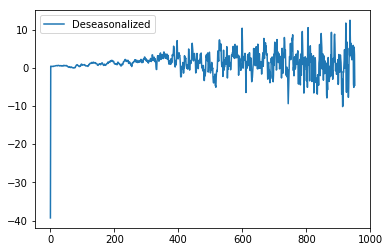

In [18]:
plt.plot(diff,label='Deseasonalized')
plt.legend()

### Modelling

In [19]:
data1=data[:'2018-12-01']

In [20]:
data1.tail()

,IPG
DATE,
2018-08-01,113.2758
2018-09-01,101.5656
2018-10-01,95.3203
2018-11-01,103.5750
2018-12-01,112.9498


In [21]:
data1.shape

(960, 1)

In [22]:
data1['Month']=np.arange(1,len(data1)+1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
train,test=data1[:len(data1)-288],data1[len(data1)-288:]
test.head()

,IPG,Month
DATE,,
1995-01-01,92.7412,673
1995-02-01,87.6670,674
1995-03-01,81.5205,675
1995-04-01,74.0457,676
1995-05-01,73.5003,677


### Regression On Time

In [24]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [25]:
xtrain,ytrain=train[['Month']],train[['IPG']]
xtest,ytest=test[['Month']],test[['IPG']]

In [26]:
lr=LinearRegression()
ypred_time=lr.fit(xtrain,ytrain).predict(xtest)

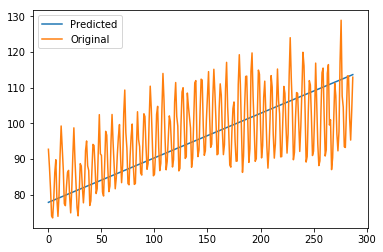

In [27]:
plt.plot(np.arange(len(ytest)),ypred_time,label='Predicted')
plt.plot(np.arange(len(ytest)),ytest,label='Original')
plt.legend()

In [28]:
rmse_time= np.sqrt(metrics.mean_squared_error(ytest,ypred_time))
rmse_time

9.913628268257199

In [29]:
mape_time = np.mean(np.abs((ytest-ypred_time)/ytest))
mape_time[0]

0.08362284881314917

In [30]:
fin=pd.DataFrame({'Method':['Regression On Time'],'RMSE':rmse_time,'MAPE':mape_time})
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.913628,0.083623


### Regression On Seasonality

In [31]:
m=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']

In [32]:
data1['New_Month']=m*80
data1.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,IPG,Month,New_Month
DATE,,,
1939-01-01,3.3842,1,m1
1939-02-01,3.4100,2,m2
1939-03-01,3.4875,3,m3
1939-04-01,3.5133,4,m4
1939-05-01,3.5133,5,m5


In [33]:
data1=pd.get_dummies(data1,drop_first=True)
data1.head()

,IPG,Month,New_Month_m10,New_Month_m11,New_Month_m12,New_Month_m2,New_Month_m3,New_Month_m4,New_Month_m5,New_Month_m6,New_Month_m7,New_Month_m8,New_Month_m9
DATE,,,,,,,,,,,,,
1939-01-01,3.3842,1,0,0,0,0,0,0,0,0,0,0,0
1939-02-01,3.4100,2,0,0,0,1,0,0,0,0,0,0,0
1939-03-01,3.4875,3,0,0,0,0,1,0,0,0,0,0,0
1939-04-01,3.5133,4,0,0,0,0,0,1,0,0,0,0,0
1939-05-01,3.5133,5,0,0,0,0,0,0,1,0,0,0,0


In [34]:
train,test=data1[:len(data1)-288],data1[len(data1)-288:]
train.shape

(672, 13)

In [35]:
xtrain,ytrain=train.drop('IPG',axis=1),train[['IPG']]
xtest,ytest=test.drop('IPG',axis=1),test[['IPG']]

In [36]:
lr=LinearRegression()
ypred_sea=lr.fit(xtrain,ytrain).predict(xtest)

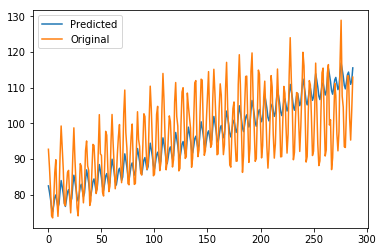

In [37]:
plt.plot(np.arange(len(ytest)),ypred_sea,label='Predicted')
plt.plot(np.arange(len(ytest)),ytest,label='Original')
plt.legend()

In [38]:
rmse_sea= np.sqrt(metrics.mean_squared_error(ytest,ypred_sea))
rmse_sea

8.33502757661647

In [39]:
mape_sea = np.mean(np.abs((ytest-ypred_sea)/ytest))
mape_sea[0]

0.06850566990732508

In [40]:
x=pd.DataFrame({'Method':['Reg On Seasonality'],'RMSE':rmse_sea,'MAPE':mape_sea})
x

,Method,RMSE,MAPE
IPG,Reg On Seasonality,8.335028,0.068506


In [41]:
fin=pd.concat([fin,x],axis=0)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.913628,0.083623
IPG,Reg On Seasonality,8.335028,0.068506


### Autoregression

In [42]:
data=data[:'2018-12-01']
data.shape

(960, 1)

In [43]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot

from statsmodels.tsa.ar_model import AR

In [44]:
train,test=data[:len(data)-288],data[len(data)-288:]
train.shape

(672, 1)

In [45]:
# train autoregression model
mod=AR(train)
mod_fit = mod.fit()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
# how many lags considered statistically, what are their beta vals

print('Lag: %s' %mod_fit.k_ar)
print('Coeffs: %s' %mod_fit.params)

# mod_fit.l_ar gives us the threshold lag at which the lags start coming inside the confidence interval

Lag: 19
Coeffs: const      0.237898
L1.IPG     0.832518
L2.IPG    -0.196713
L3.IPG     0.058386
L4.IPG     0.015135
L5.IPG     0.131684
L6.IPG    -0.097258
L7.IPG     0.057789
L8.IPG    -0.078933
L9.IPG     0.048400
L10.IPG    0.016235
L11.IPG    0.085407
L12.IPG    0.626574
L13.IPG   -0.364074
L14.IPG   -0.084767
L15.IPG    0.010397
L16.IPG   -0.056677
L17.IPG   -0.036878
L18.IPG    0.068900
L19.IPG   -0.033496
dtype: float64


In [47]:
# predictions

pred=mod_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

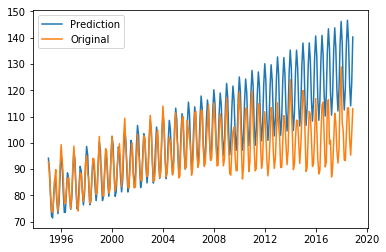

In [48]:
plt.plot(pred,label='Prediction')
plt.plot(test,label='Original')
plt.legend()

In [49]:
rmse_ar=np.sqrt(metrics.mean_squared_error(test,pred))
rmse_ar

12.41481019861781

In [50]:
x=np.asarray(test)
test

,IPG
DATE,
1995-01-01,92.7412
1995-02-01,87.6670
1995-03-01,81.5205
1995-04-01,74.0457
1995-05-01,73.5003
1995-06-01,78.5503
1995-07-01,86.2425
1995-08-01,89.8063
1995-09-01,78.7442


In [51]:
mape_ar=np.mean(np.abs((test['IPG']-pred)/test['IPG']))
mape_ar

0.08779781218473375

In [52]:
test

,IPG
DATE,
1995-01-01,92.7412
1995-02-01,87.6670
1995-03-01,81.5205
1995-04-01,74.0457
1995-05-01,73.5003
1995-06-01,78.5503
1995-07-01,86.2425
1995-08-01,89.8063
1995-09-01,78.7442


In [53]:
x=pd.DataFrame({'Method':['AR'],'RMSE':rmse_ar,'MAPE':mape_ar})
x

,Method,RMSE,MAPE
0,AR,12.41481,0.087798


In [54]:
fin=pd.concat([fin,x],axis=0)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.913628,0.083623
IPG,Reg On Seasonality,8.335028,0.068506
0,AR,12.414810,0.087798


### ARIMA

In [55]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
p=d=q=range(0,5)

import itertools
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [57]:
import warnings
warnings.filterwarnings('ignore')

for i in pdq:
    try:
        model_arima=ARIMA(train,order=i)
        model_arima_fit=model_arima.fit()
        print(i,model_arima_fit.aic)
        
    except:
        continue

(0, 0, 0) 6220.009770108627
(0, 0, 1) 5343.729949613807
(0, 1, 0) 3425.89395015854
(0, 1, 1) 3160.797058245038
(0, 1, 3) 2926.3634649559817
(0, 1, 4) 2861.938375041694
(0, 2, 0) 3524.9996324975446
(0, 2, 1) 3476.545190208354
(0, 2, 2) 3164.4939719188687
(0, 2, 3) 3147.5001003279735
(1, 0, 0) 3437.085114715944
(1, 0, 1) 3169.7874492415103
(1, 0, 2) 3151.9293584409806
(1, 0, 3) 2974.593634006509
(1, 0, 4) 2915.8633151279128
(1, 1, 0) 3302.837664413224
(1, 1, 1) 3320.9267808640184
(1, 1, 2) 2989.2082999222953
(1, 1, 3) 2911.4296144829823
(1, 1, 4) 2881.594686900779
(1, 2, 0) 3502.2407017634077
(2, 0, 0) 3310.283792039124
(2, 0, 1) 3371.3655816390437
(2, 0, 2) 3042.0261592447932
(2, 0, 3) 2965.788465313544
(2, 0, 4) 2922.197116224809
(2, 1, 0) 2885.9607419104077
(2, 1, 2) 2550.840578251575
(2, 1, 4) 2536.151854505253
(2, 2, 0) 3367.613889471031
(3, 0, 0) 2899.389664618273
(3, 0, 1) 2764.9956033351996
(3, 1, 0) 2739.8041603094753
(3, 1, 1) 2703.8088901729766
(3, 1, 4) 2600.3434463118037
(3,

In [58]:
# min AIC for 4,1,3

model_arima=ARIMA(train, order=(4,1,3)) 
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

2533.6267111306643


In [59]:
test.shape

(288, 1)

In [60]:
pred=model_arima_fit.forecast(steps=288)[0]
pred

array([ 91.18214123,  89.77339301,  82.60538125,  76.77156565,
        78.34269973,  85.81592119,  91.8316953 ,  90.46580657,
        83.20866131,  77.45478132,  79.09289089,  86.5969912 ,
        92.55802631,  91.11444313,  83.83133196,  78.13061027,
        79.84712181,  87.37646879,  93.28417539,  91.76221626,
        84.45427305,  78.80717606,  80.60198229,  88.15576824,
        94.00954609,  92.40937944,  85.07738939,  79.48452445,
        81.35744867,  88.93488882,  94.7341327 ,  93.05593968,
        85.70068869,  80.16265819,  82.11351512,  89.71382234,
        95.45793274,  93.70190274,  86.32417914,  80.8415797 ,
        82.87017584,  90.49256059,  96.18094383,  94.34727444,
        86.94786896,  81.52129133,  83.62742498,  91.2710954 ,
        96.90316365,  94.99206067,  87.5717663 ,  82.20179535,
        84.38525662,  92.0494186 ,  97.62458999,  95.63626739,
        88.19587933,  82.88309392,  85.14366479,  92.82752205,
        98.34522071,  96.27990059,  88.82021617,  83.56

In [61]:
rmse_arima=np.sqrt(metrics.mean_squared_error(test,pred))
rmse_arima

7.2762831282658045

In [62]:
mape_arima=np.mean(np.abs((np.asarray(test)-pred)/np.asarray(test)))
mape_arima

0.1378237237558945

In [63]:
x=pd.DataFrame({'Method':['ARIMA'],'RMSE':rmse_arima,'MAPE':mape_arima})
x

,Method,RMSE,MAPE
0,ARIMA,7.276283,0.137824


In [64]:
fin=pd.concat([fin,x],axis=0)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.913628,0.083623
IPG,Reg On Seasonality,8.335028,0.068506
0,AR,12.414810,0.087798
0,ARIMA,7.276283,0.137824


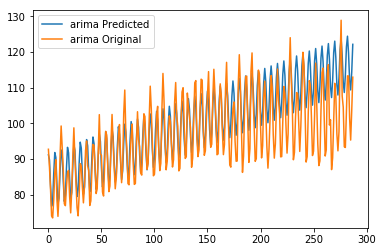

In [65]:
plt.plot(pred,label='arima Predicted')
plt.plot(test.values,label='arima Original')
plt.legend()

### Simple Average

In [66]:
y_hat_avg=test.copy()

In [67]:
y_hat_avg['Simple_Avg_Forecast']=train['IPG'].mean()

In [68]:
y_hat_avg.head()

,IPG,Simple_Avg_Forecast
DATE,,
1995-01-01,92.7412,35.894772
1995-02-01,87.6670,35.894772
1995-03-01,81.5205,35.894772
1995-04-01,74.0457,35.894772
1995-05-01,73.5003,35.894772


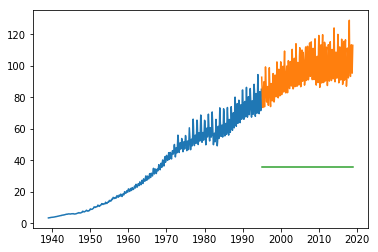

In [69]:
plt.plot(train['IPG'],label=train)
plt.plot(y_hat_avg['IPG'],label='test')
plt.plot(y_hat_avg['Simple_Avg_Forecast'],label='Predicted')
plt.show()

In [70]:
rmse_avg=np.sqrt(metrics.mean_squared_error(y_hat_avg['IPG'],y_hat_avg['Simple_Avg_Forecast']))
rmse_avg

61.91439561081234

In [71]:
mape_avg=np.mean(np.abs((y_hat_avg['IPG']-y_hat_avg['Simple_Avg_Forecast'])/y_hat_avg['IPG']))
mape_avg

0.6246702489666103

### Moving Average

In [84]:
data2=data.copy()
data2['Mov_Avg_Forecast']=data['IPG'].rolling(50).mean()
data2.tail()

,IPG,Mov_Avg_Forecast
DATE,,
2018-08-01,113.2758,103.081276
2018-09-01,101.5656,102.939928
2018-10-01,95.3203,102.678550
2018-11-01,103.5750,102.741574
2018-12-01,112.9498,103.157838


In [85]:
train=data2[:len(data2)-288]
test=data2[len(data2)-288:]

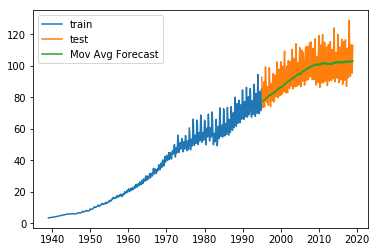

In [89]:
plt.plot(train['IPG'],label='train')
plt.plot(test['IPG'],label='test')
plt.plot(test['Mov_Avg_Forecast'],label='Mov Avg Forecast')
plt.legend()

In [90]:
rmse_movavg=np.sqrt(metrics.mean_squared_error(test['IPG'],test['Mov_Avg_Forecast']))
rmse_movavg

8.768590501387603

In [92]:
mape_movavg=np.mean(np.abs((test['IPG']-test['Mov_Avg_Forecast'])/test['IPG']))
mape_movavg

0.07437572671967968

### Naive Bayes

In [97]:
data3=data.shift(1)
data3.head()

,IPG
DATE,
1939-01-01,NaN
1939-02-01,3.3842
1939-03-01,3.4100
1939-04-01,3.4875
1939-05-01,3.5133


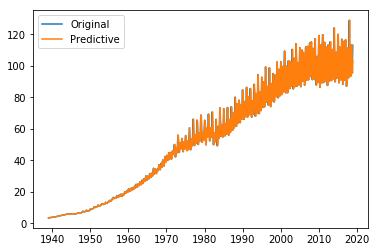

In [98]:
plt.plot(data['IPG'],label='Original')
plt.plot(data3['IPG'],label='Predictive')
plt.legend()

In [109]:
data3.dropna(inplace=True)

In [111]:
data3.isnull().sum()

IPG    0
dtype: int64

In [113]:
data3.head()

,IPG
DATE,
1939-02-01,3.3842
1939-03-01,3.4100
1939-04-01,3.4875
1939-05-01,3.5133
1939-06-01,3.5133


In [114]:
data=data[1:]

In [115]:
data.head()

,IPG
DATE,
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
1939-06-01,3.5650


In [116]:
rmse_nb=np.sqrt(metrics.mean_squared_error(data['IPG'],data3['IPG']))
rmse_nb

5.4213677206804824

In [117]:
mape_movavg=np.mean(np.abs((test['IPG']-test['Mov_Avg_Forecast'])/test['IPG']))
mape_movavg

0.07437572671967968

### Simple Exponential Smoothing

In [118]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing

In [119]:
data.shape

(959, 1)

In [121]:
# loading data
data=pd.read_csv('C:/Users/user/PGP-DSE/Time Series/Project group - 3/Electric_Production.csv',header=0,index_col=0,
                parse_dates=['DATE'])
data.tail()

,IPG2211A2N
DATE,
2018-12-01,112.9498
2019-01-01,123.7679
2019-02-01,113.0855
2019-03-01,108.0490
2019-04-01,88.8719


,IPG2211A2N
DATE,
2018-12-01,112.9498
2019-01-01,123.7679
2019-02-01,113.0855
2019-03-01,108.0490
2019-04-01,88.8719


In [127]:
data=data[:'2018-12-01']
data.tail()

,IPG2211A2N
DATE,
2018-08-01,113.2758
2018-09-01,101.5656
2018-10-01,95.3203
2018-11-01,103.5750
2018-12-01,112.9498


In [128]:
train=data[:len(data)-288]
test=data[len(data)-288:]

In [129]:
# create class
model = SimpleExpSmoothing(train['IPG2211A2N'])
model_fit=model.fit(smoothing_level=0.6,optimized=False)
model_fit.params

{'smoothing_level': 0.6,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 3.3842,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
y_hat_ses = test.copy()

In [131]:
x=model_fit.forecast(len(y_hat_ses['IPG2211A2N']))
x

1995-01-01    81.022825
1995-02-01    81.022825
1995-03-01    81.022825
1995-04-01    81.022825
1995-05-01    81.022825
1995-06-01    81.022825
1995-07-01    81.022825
1995-08-01    81.022825
1995-09-01    81.022825
1995-10-01    81.022825
1995-11-01    81.022825
1995-12-01    81.022825
1996-01-01    81.022825
1996-02-01    81.022825
1996-03-01    81.022825
1996-04-01    81.022825
1996-05-01    81.022825
1996-06-01    81.022825
1996-07-01    81.022825
1996-08-01    81.022825
1996-09-01    81.022825
1996-10-01    81.022825
1996-11-01    81.022825
1996-12-01    81.022825
1997-01-01    81.022825
1997-02-01    81.022825
1997-03-01    81.022825
1997-04-01    81.022825
1997-05-01    81.022825
1997-06-01    81.022825
                ...    
2016-07-01    81.022825
2016-08-01    81.022825
2016-09-01    81.022825
2016-10-01    81.022825
2016-11-01    81.022825
2016-12-01    81.022825
2017-01-01    81.022825
2017-02-01    81.022825
2017-03-01    81.022825
2017-04-01    81.022825
2017-05-01    81

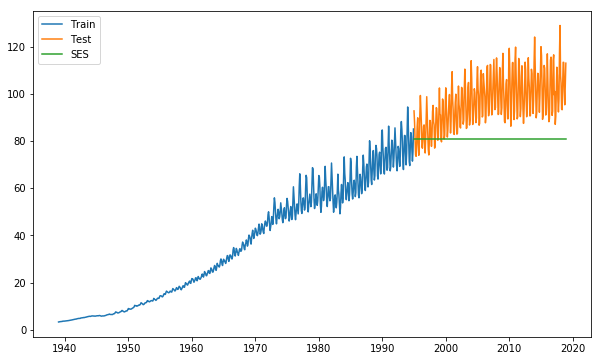

In [132]:
plt.figure(figsize=(10,6))
plt.plot(train['IPG2211A2N'],label='Train')
plt.plot(test['IPG2211A2N'],label='Test')
plt.plot(x,label='SES')
plt.legend()

In [133]:
rmse_ses=np.sqrt(metrics.mean_squared_error(test['IPG2211A2N'],x))
rmse_ses

19.194025712681793

In [134]:
mape_ses=np.mean(np.abs((test['IPG2211A2N']-x)/test['IPG2211A2N']))
mape_ses

0.15901695018195053

### Holts - Double Exp Smoothing

In [135]:
model2=ExponentialSmoothing(np.asarray(train['IPG2211A2N']),trend='add').fit()
model2.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 3.3841467636335922,
 'initial_slope': 0.12155032071497804,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [136]:
y_hat_holt=test.copy()

In [137]:
y_hat_holt['Holt']=model2.forecast(len(test['IPG2211A2N']))
y_hat_holt['Holt']

DATE
1995-01-01     85.198750
1995-02-01     85.320301
1995-03-01     85.441851
1995-04-01     85.563401
1995-05-01     85.684952
1995-06-01     85.806502
1995-07-01     85.928052
1995-08-01     86.049603
1995-09-01     86.171153
1995-10-01     86.292703
1995-11-01     86.414254
1995-12-01     86.535804
1996-01-01     86.657354
1996-02-01     86.778904
1996-03-01     86.900455
1996-04-01     87.022005
1996-05-01     87.143555
1996-06-01     87.265106
1996-07-01     87.386656
1996-08-01     87.508206
1996-09-01     87.629757
1996-10-01     87.751307
1996-11-01     87.872857
1996-12-01     87.994408
1997-01-01     88.115958
1997-02-01     88.237508
1997-03-01     88.359059
1997-04-01     88.480609
1997-05-01     88.602159
1997-06-01     88.723710
                 ...    
2016-07-01    116.558733
2016-08-01    116.680283
2016-09-01    116.801834
2016-10-01    116.923384
2016-11-01    117.044934
2016-12-01    117.166485
2017-01-01    117.288035
2017-02-01    117.409585
2017-03-01    117.53

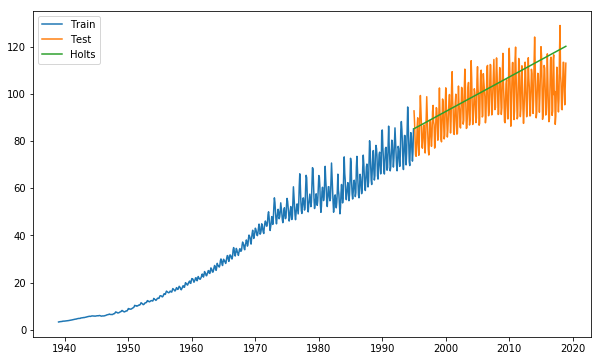

In [138]:
plt.figure(figsize=(10,6))
plt.plot(train['IPG2211A2N'],label='Train')
plt.plot(test['IPG2211A2N'],label='Test')
plt.plot(y_hat_holt['Holt'],label='Holts')
plt.legend()

In [139]:
rmse_holt=np.sqrt(metrics.mean_squared_error(test['IPG2211A2N'],y_hat_holt['Holt']))
rmse_holt

11.336181148746745

In [140]:
mape_holt=np.mean(np.abs((test['IPG2211A2N']-y_hat_holt['Holt'])/test['IPG2211A2N']))
mape_holt

0.09763564666668714

### Holts Winter - Triple Exponential Smoothing

### Additive

In [141]:
model3=ExponentialSmoothing(np.asarray(train['IPG2211A2N']),trend='add',seasonal='add',seasonal_periods=12).fit()
model3.params
# seasonal periods = 12 because data in month wise

{'smoothing_level': 0.32498346276713447,
 'smoothing_slope': 7.146348742525427e-18,
 'smoothing_seasonal': 0.45037997091038634,
 'damping_slope': nan,
 'initial_level': 39.42746660433447,
 'initial_slope': 0.11249067745002639,
 'initial_seasons': array([-36.21157329, -36.21386363, -36.19359055, -36.20394954,
        -36.22881502, -36.21410864, -36.24831257, -36.2582358 ,
        -36.23588231, -36.2694682 , -36.2582632 , -36.28814213]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [144]:
y_hat_holt['Holt Winter Add']=model3.forecast(len(test['IPG2211A2N']))
y_hat_holt['Holt Winter Add']

DATE
1995-01-01     92.119853
1995-02-01     85.435579
1995-03-01     78.700869
1995-04-01     71.370996
1995-05-01     70.021676
1995-06-01     77.582311
1995-07-01     83.584848
1995-08-01     82.789726
1995-09-01     76.816016
1995-10-01     72.604504
1995-11-01     76.845500
1995-12-01     86.750083
1996-01-01     93.469742
1996-02-01     86.785467
1996-03-01     80.050757
1996-04-01     72.720884
1996-05-01     71.371564
1996-06-01     78.932199
1996-07-01     84.934736
1996-08-01     84.139614
1996-09-01     78.165904
1996-10-01     73.954392
1996-11-01     78.195388
1996-12-01     88.099971
1997-01-01     94.819630
1997-02-01     88.135355
1997-03-01     81.400645
1997-04-01     74.070772
1997-05-01     72.721452
1997-06-01     80.282087
                 ...    
2016-07-01    111.932499
2016-08-01    111.137377
2016-09-01    105.163666
2016-10-01    100.952155
2016-11-01    105.193151
2016-12-01    115.097734
2017-01-01    121.817392
2017-02-01    115.133118
2017-03-01    108.39

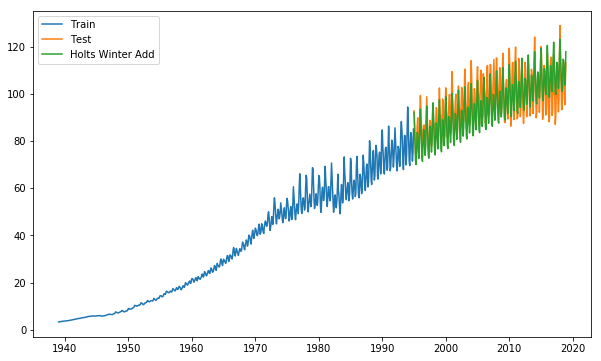

In [145]:
plt.figure(figsize=(10,6))
plt.plot(train['IPG2211A2N'],label='Train')
plt.plot(test['IPG2211A2N'],label='Test')
plt.plot(y_hat_holt['Holt Winter Add'],label='Holts Winter Add')
plt.legend()

In [146]:
rmse_winadd=np.sqrt(metrics.mean_squared_error(test['IPG2211A2N'],y_hat_holt['Holt Winter Add']))
rmse_winadd

5.741906281037332

In [147]:
mape_winadd=np.mean(np.abs((test['IPG2211A2N']-y_hat_holt['Holt Winter Add'])/test['IPG2211A2N']))
mape_winadd

0.04879267730660125

### Multiplicative

In [148]:
model5=ExponentialSmoothing(np.asarray(train['IPG2211A2N']),trend='mul',seasonal='mul',seasonal_periods=12).fit()
model5.params
# seasonal periods = 12 because data in month wise

{'smoothing_level': 0.21052631578947367,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.3684210526315789,
 'damping_slope': nan,
 'initial_level': 39.787555357142864,
 'initial_slope': 0.03067847222222223,
 'initial_seasons': array([0.08505675, 0.08570519, 0.08765304, 0.08830148, 0.08830148,
        0.08960088, 0.08960088, 0.09090028, 0.09349657, 0.09349657,
        0.09414502, 0.09414502]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [150]:
y_hat_holt['Holt Winter Mul']=model5.forecast(len(test['IPG2211A2N']))
y_hat_holt['Holt Winter Mul']

DATE
1995-01-01     92.724424
1995-02-01     86.435887
1995-03-01     79.961424
1995-04-01     72.380174
1995-05-01     70.661150
1995-06-01     77.786363
1995-07-01     83.979170
1995-08-01     83.289208
1995-09-01     77.123471
1995-10-01     72.595940
1995-11-01     76.708685
1995-12-01     87.180415
1996-01-01     94.120721
1996-02-01     87.737487
1996-03-01     81.165528
1996-04-01     73.470115
1996-05-01     71.725206
1996-06-01     78.957714
1996-07-01     85.243776
1996-08-01     84.543424
1996-09-01     78.284839
1996-10-01     73.689131
1996-11-01     77.863808
1996-12-01     88.493227
1997-01-01     95.538044
1997-02-01     89.058688
1997-03-01     82.387764
1997-04-01     74.576470
1997-05-01     72.805285
1997-06-01     80.146704
                 ...    
2016-07-01    114.943570
2016-08-01    113.999209
2016-09-01    105.560070
2016-10-01     99.363170
2016-11-01    104.992346
2016-12-01    119.325162
2017-01-01    128.824465
2017-02-01    120.087636
2017-03-01    111.09

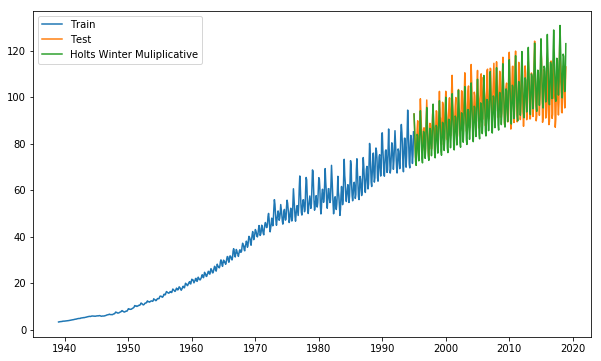

In [151]:
plt.figure(figsize=(10,6))
plt.plot(train['IPG2211A2N'],label='Train')
plt.plot(test['IPG2211A2N'],label='Test')
plt.plot(y_hat_holt['Holt Winter Mul'],label='Holts Winter Muliplicative')
plt.legend()

In [152]:
rmse_mul=np.sqrt(metrics.mean_squared_error(test['IPG2211A2N'],y_hat_holt['Holt Winter Mul']))
rmse_mul

5.8997248095980765

In [153]:
mape_mul=np.mean(np.abs((test['IPG2211A2N']-y_hat_holt['Holt Winter Mul'])/test['IPG2211A2N']))
mape_mul

0.04971581451096088

In [72]:
x=pd.DataFrame({'Method':['Simple Avg','Moving Avg','NB','SES','Holts','Holts Winter'],'RMSE':[61.914,8.769,8.690,19.194,11.357,5.9]
                ,'MAPE':[0.624,0.074,0.076,0.159,0.097,0.049]})
x

,Method,RMSE,MAPE
0,Simple Avg,61.914,0.624
1,Moving Avg,8.769,0.074
2,NB,8.690,0.076
3,SES,19.194,0.159
4,Holts,11.357,0.097
5,Holts Winter,5.900,0.049


In [73]:
fin=pd.concat([fin,x],axis=0)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.913628,0.083623
IPG,Reg On Seasonality,8.335028,0.068506
0,AR,12.414810,0.087798
0,ARIMA,7.276283,0.137824
0,Simple Avg,61.914000,0.624000
1,Moving Avg,8.769000,0.074000
2,NB,8.690000,0.076000
3,SES,19.194000,0.159000
4,Holts,11.357000,0.097000
5,Holts Winter,5.900000,0.049000


In [74]:
fin['RMSE']=round(fin['RMSE'],3)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.914,0.083623
IPG,Reg On Seasonality,8.335,0.068506
0,AR,12.415,0.087798
0,ARIMA,7.276,0.137824
0,Simple Avg,61.914,0.624000
1,Moving Avg,8.769,0.074000
2,NB,8.690,0.076000
3,SES,19.194,0.159000
4,Holts,11.357,0.097000
5,Holts Winter,5.900,0.049000


In [75]:
fin['MAPE']=round(fin['MAPE'],3)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.914,0.084
IPG,Reg On Seasonality,8.335,0.069
0,AR,12.415,0.088
0,ARIMA,7.276,0.138
0,Simple Avg,61.914,0.624
1,Moving Avg,8.769,0.074
2,NB,8.690,0.076
3,SES,19.194,0.159
4,Holts,11.357,0.097
5,Holts Winter,5.900,0.049


In [76]:
x=pd.DataFrame({'Method':['Holts Winter Additive'],'RMSE':[5.742],'MAPE':[0.048]})
x

,Method,RMSE,MAPE
0,Holts Winter Additive,5.742,0.048


In [77]:
fin=pd.concat([fin,x],axis=0)
fin

,Method,RMSE,MAPE
IPG,Regression On Time,9.914,0.084
IPG,Reg On Seasonality,8.335,0.069
0,AR,12.415,0.088
0,ARIMA,7.276,0.138
0,Simple Avg,61.914,0.624
1,Moving Avg,8.769,0.074
2,NB,8.690,0.076
3,SES,19.194,0.159
4,Holts,11.357,0.097
5,Holts Winter,5.900,0.049
